<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/ZTM_Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, precision_score,recall_score,f1_score,plot_roc_curve

In [27]:
data = pd.read_csv('/content/drive/MyDrive/ZTM/heart-disease.csv')

In [28]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Corr with target')

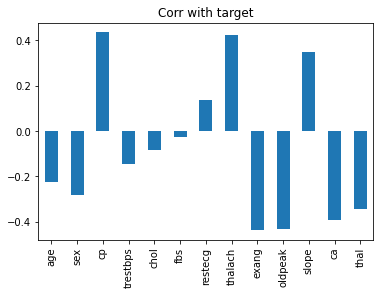

In [30]:
data.corr()['target'][0:-1].plot(kind='bar')
plt.title('Corr with target')

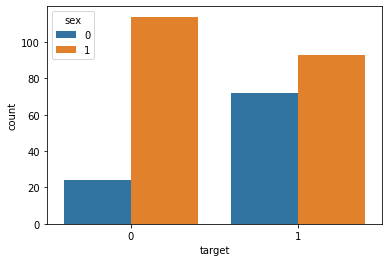

In [31]:
sns.countplot(data=data,x='target',hue='sex')

Text(0, 0.5, 'number')

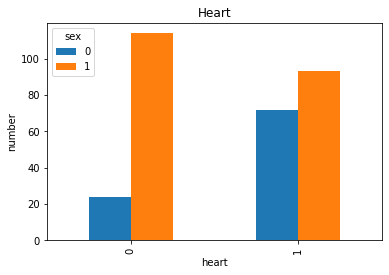

In [32]:
pd.crosstab(data['target'],data['sex']).plot(kind='bar')
plt.title('Heart')
plt.xlabel('heart')
plt.ylabel('number')

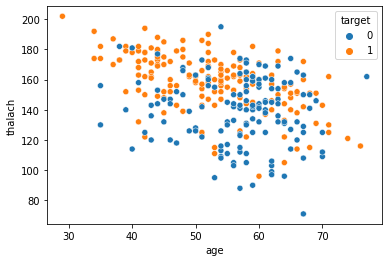

In [33]:
sns.scatterplot(data=data,x='age',y='thalach',hue='target')

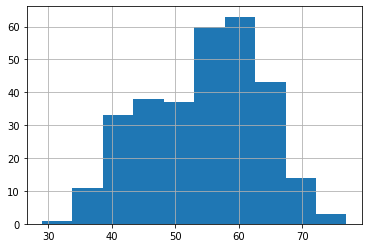

In [34]:
data['age'].hist()

In [35]:
from scipy.stats import skew


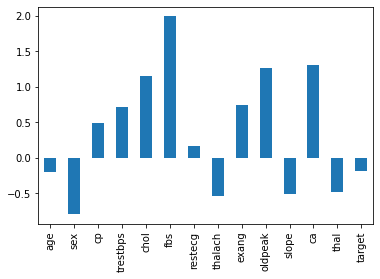

In [36]:
data.skew().plot(kind='bar')

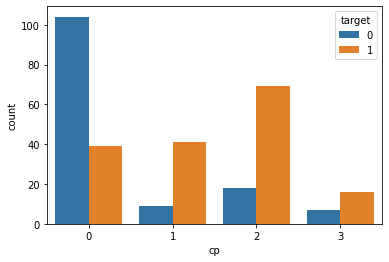

In [37]:
sns.countplot(data=data,x='cp',hue='target')

In [38]:
y = data['target']
X = data.drop('target',axis=1)

In [61]:
models = {'logistics regression':LogisticRegression(max_iter=1000),
          'KNN':KNeighborsClassifier(n_neighbors=10),
          'Random Forest':RandomForestClassifier()}

In [62]:
def fit_and_score(models,X,y):
    model_accs = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_accs[name]= model.score(X_test,y_test)
    model_accs =pd.DataFrame(model_accs, index=['Acc'])
    return model_accs
model_accs =fit_and_score(models,X,y)

In [63]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6593406593406593

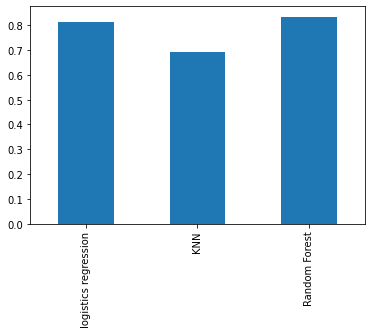

In [64]:
model_accs.iloc[0].plot(kind='bar')

In [86]:
train_score = []
test_score = []
neighbors = range(1,200)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score.append(knn.score(X_test,y_test))
    train_score.append(knn.score(X_train,y_train))

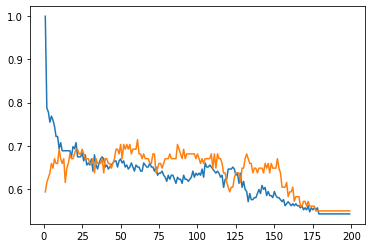

In [87]:
plt.plot(neighbors,train_score)
plt.plot(neighbors,test_score)